In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [3]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-05\data2\lev_05_mp.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('Item_Code', String),
        ('OutOfHome_Consumption_Quantity', Float64),
        ('OutOfHome_Consumption_Value', Float64),
        ('Total_Consumption_Quantity', Float64),
        ('Total_Consumption_Value', Float64),
        ('Source', String),
        ('Multiplier', Int64)])

In [4]:
cols = [
    'State',
    'Item_Code',
    'OutOfHome_Consumption_Value',
    'OutOfHome_Consumption_Quantity',
    'Total_Consumption_Quantity',
    'Total_Consumption_Value',
]

pdf = pdf [cols]


In [5]:

pdf = pdf.filter(
    pl.col('State') == '23'
)

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

'Desire Filter shape (1355664, 6)'

In [6]:
print(f"Number of unique Item code present {pdf['Item_Code'].n_unique()}")

Number of unique Item code present 141


In [7]:
pdf.estimated_size(unit='mb')

16.156936645507812

In [8]:
pdf.columns

['State',
 'Item_Code',
 'OutOfHome_Consumption_Value',
 'OutOfHome_Consumption_Quantity',
 'Total_Consumption_Quantity',
 'Total_Consumption_Value']

In [9]:
pdf.estimated_size(unit='mb')

16.156936645507812

In [10]:
df = pdf.to_pandas()

# Functions

In [11]:
def plot_graph(col: str, df: pd.DataFrame) -> None:
    # Create figure and axes with proper size
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Bar plot
    sns.barplot(df[col], orient='h', ax=ax1)
    ax1.set_title(f"{col} Count")

    # KDE plot
    sns.kdeplot(df[col], ax=ax2)
    ax2.set_title(f"{col} Frequency")

    plt.tight_layout()
    plt.show()

In [12]:
def auto_label_and_plot(col_name: str, map_dictionary: dict):
    # Map the codes to labels
    df[col_name] = df['Item_Code'].map(map_dictionary)
    
    dataframe_name = f"{col_name}_df"
    # Group the data
    dataframe_name = df.groupby(col_name)[[
        'OutOfHome_Consumption_Value',
        'OutOfHome_Consumption_Quantity',
        'Total_Consumption_Quantity',
        'Total_Consumption_Value'
    ]].count()
    
    # Display summary
    display(dataframe_name.T)
    display(dataframe_name.describe().T)
    
    for col in dataframe_name.columns:
        plot_graph(col=col, df=dataframe_name)


# Category Mapping

category,beverages,cereal substitute,cereals,edible oil,"egg, fish & meat",fruits (dry),fruits (fresh),milk & milk products,pulses & products,salt & sugar,spices,vegetables
OutOfHome_Consumption_Value,0,0,10460,698,318,426,1110,6974,4252,16,1600,4038
OutOfHome_Consumption_Quantity,0,0,10460,698,0,426,0,0,4252,16,1600,0
Total_Consumption_Quantity,0,6064,27890,27932,0,23794,0,0,27944,28004,27926,0
Total_Consumption_Value,28052,6064,27838,27932,14530,23794,27234,27648,27944,28004,27926,27934


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,12.0,2491.000000,3337.587752,0.0,242.5,904.0,4091.5,10460.0
OutOfHome_Consumption_Quantity,12.0,1454.333333,3094.555551,0.0,0.0,8.0,923.5,10460.0
Total_Consumption_Quantity,12.0,14129.500000,13850.548532,0.0,0.0,14929.0,27927.5,28004.0
Total_Consumption_Value,12.0,24575.000000,7008.495805,6064.0,26374.0,27882.0,27936.5,28052.0


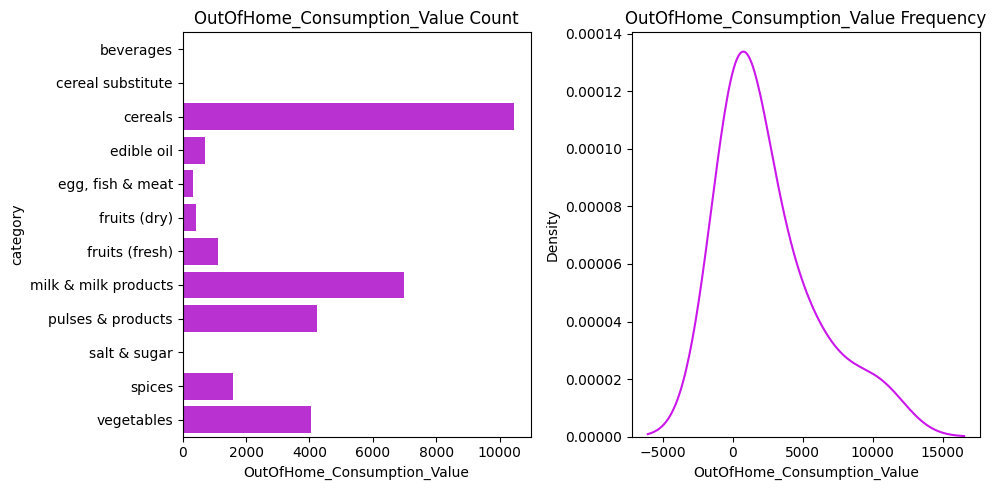

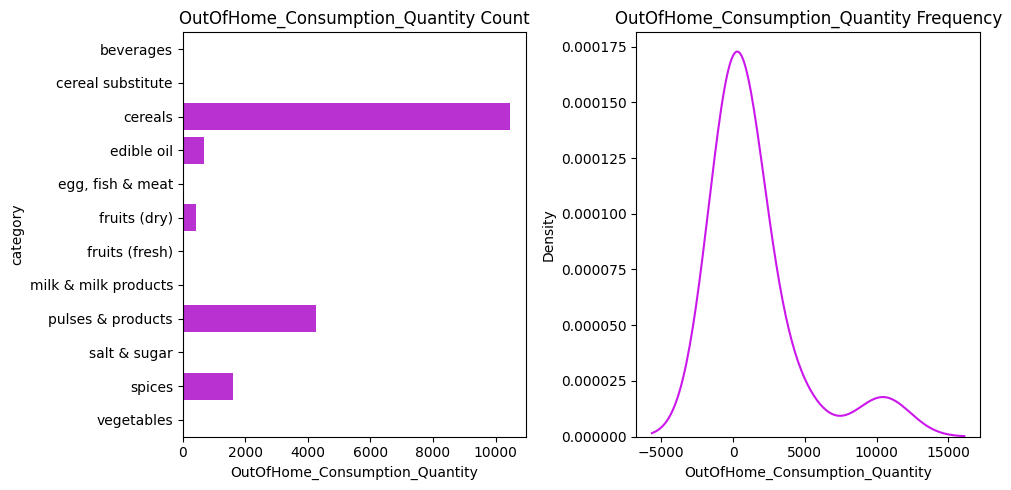

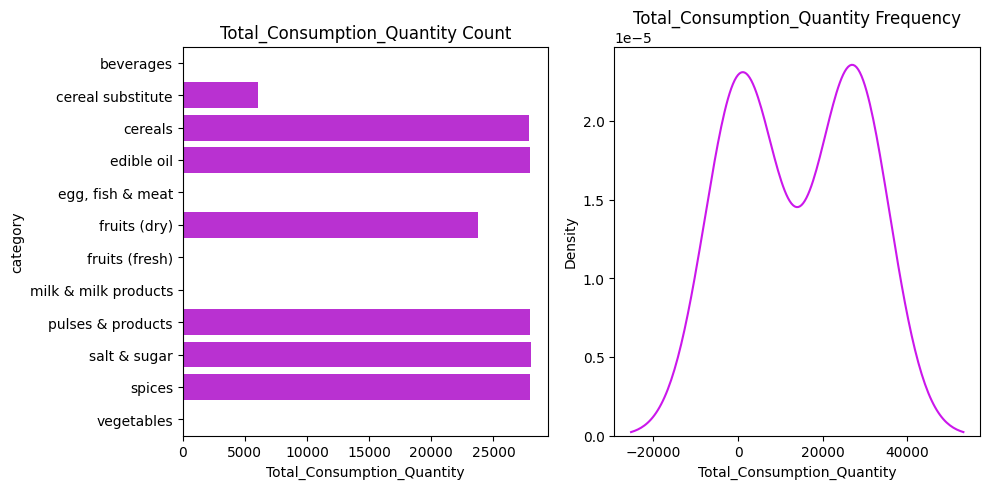

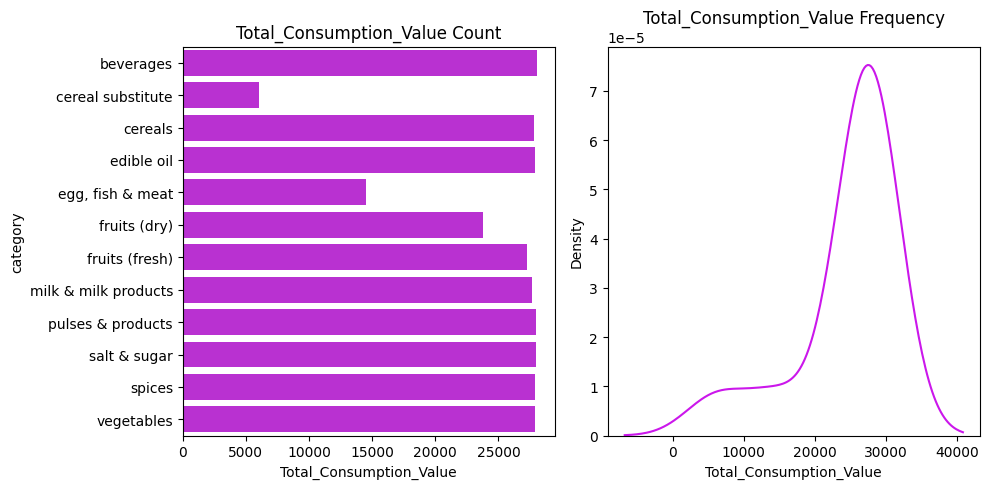

In [13]:
category_mapping = {
    129: "cereals",
    139: "cereal substitute",
    159: "pulses & products",
    179: "salt & sugar",
    169: "milk & milk products",
    219: "vegetables",
    239: "fruits (fresh)",
    249: "fruits (dry)",
    199: "egg, fish & meat",
    189: "edible oil",
    269: "spices",
    279: "beverages",
    289: "served processed food",
    299: "packaged processed food"
}

auto_label_and_plot(col_name='category', map_dictionary=category_mapping)

# Cereals

cereal_category,chira,coarse grains – PDS,coarse grains – other sources,maida,muri,other cereals & products,"other rice products (khoi/lawa, etc.)",other wheat products,rice – PDS,rice – other sources,rice-free,suji/rawa,vermicelli (sewai),wheat/atta – PDS,wheat/atta – other sources,wheat/atta-free
OutOfHome_Consumption_Value,6,0,1604,0,0,32,0,0,0,2798,0,0,0,0,9854,0
OutOfHome_Consumption_Quantity,6,0,1604,0,0,32,0,0,0,2798,0,0,0,0,9854,0
Total_Consumption_Quantity,19066,4,3146,8348,3016,1692,688,562,2380,16228,15562,16136,2880,2406,27142,15444
Total_Consumption_Value,19066,4,3146,8348,3016,1692,688,562,2380,16228,0,16136,2880,2406,27142,0


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,16.0,893.375,2513.086996,0.0,0.0,0.0,12.5,9854.0
OutOfHome_Consumption_Quantity,16.0,893.375,2513.086996,0.0,0.0,0.0,12.5,9854.0
Total_Consumption_Quantity,16.0,8418.750,8495.837157,4.0,2208.0,3081.0,15705.5,27142.0
Total_Consumption_Value,16.0,6480.875,8422.088133,0.0,656.5,2643.0,10295.0,27142.0


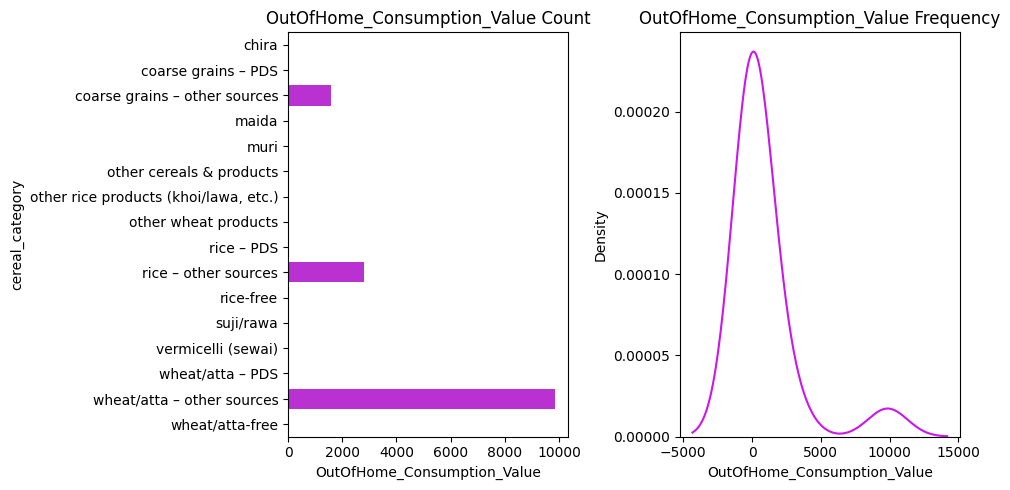

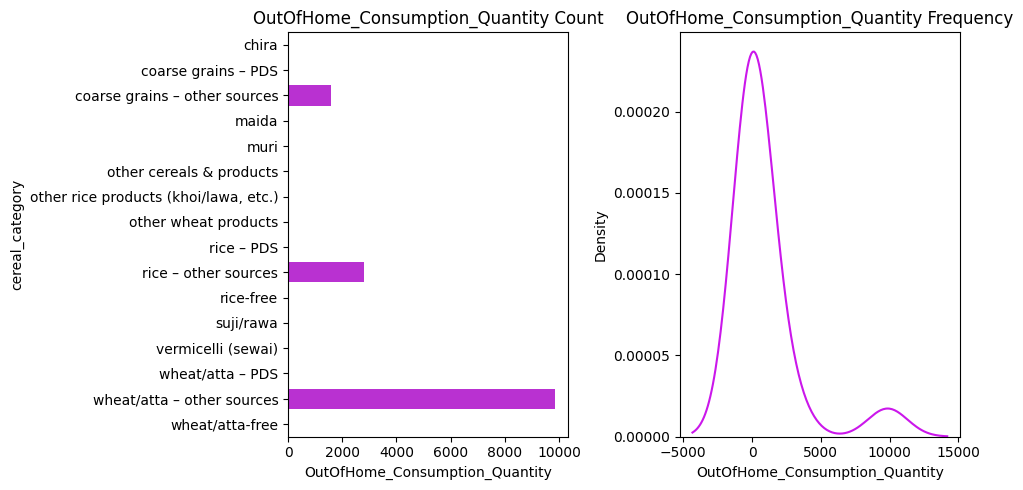

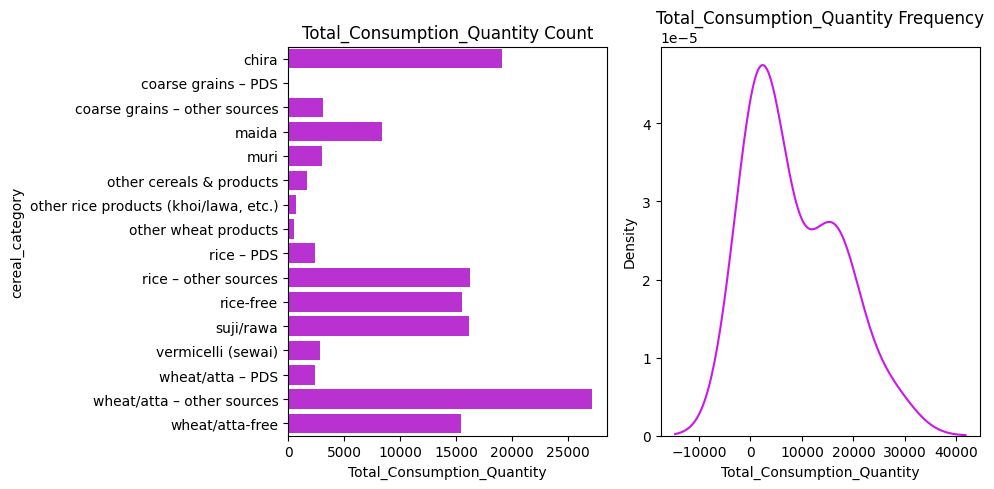

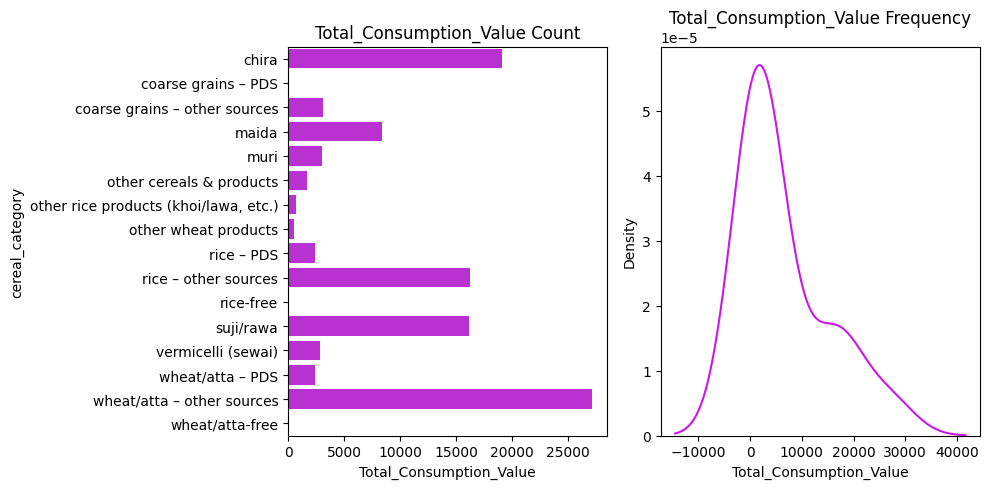

In [14]:
cereal_mapping = {
    61: "rice-free",
    62: "wheat/atta-free",
    70: "coarse grains-free",
    101: "rice – PDS",
    102: "rice – other sources",
    103: "chira",
    105: "muri",
    106: "other rice products (khoi/lawa, etc.)",
    107: "wheat/atta – PDS",
    108: "wheat/atta – other sources",
    110: "maida",
    111: "suji/rawa",
    112: "vermicelli (sewai)",
    114: "other wheat products",
    1: "coarse grains – PDS",
    2: "coarse grains – other sources",
    122: "other cereals & products",
    #129: "cereals: sub-total",
    #139: "cereal substitutes (tapioca, etc.)"
}


auto_label_and_plot(col_name='cereal_category', map_dictionary=cereal_mapping )

# Pulses

pules_category,arhar/tur,besan/gram products,gram – free,gram: split,gram: whole,masur,moong,"other pulse products (soya chunks, etc.)","other pulses (khesari, etc.)",peas/chickpeas,urd
OutOfHome_Consumption_Value,1646,0,0,1518,1292,594,1088,0,80,274,728
OutOfHome_Consumption_Quantity,1646,0,0,1518,1292,594,1088,0,80,274,728
Total_Consumption_Quantity,26608,17810,2,12830,6272,10798,21136,5102,800,2326,10016
Total_Consumption_Value,26608,17810,0,12830,6272,10798,21136,5102,800,2326,10016


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,11.0,656.363636,639.687310,0.0,40.0,594.0,1190.0,1646.0
OutOfHome_Consumption_Quantity,11.0,656.363636,639.687310,0.0,40.0,594.0,1190.0,1646.0
Total_Consumption_Quantity,11.0,10336.363636,8658.015607,2.0,3714.0,10016.0,15320.0,26608.0
Total_Consumption_Value,11.0,10336.181818,8658.254349,0.0,3714.0,10016.0,15320.0,26608.0


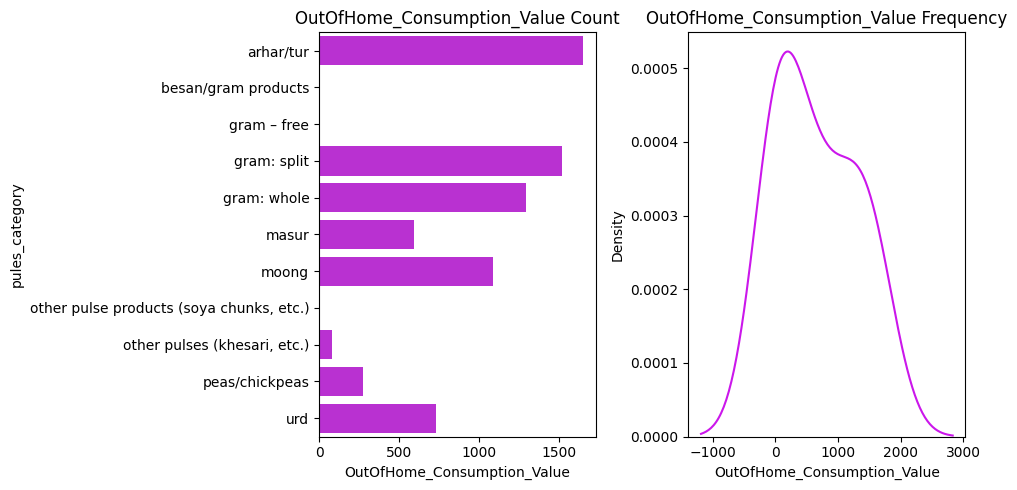

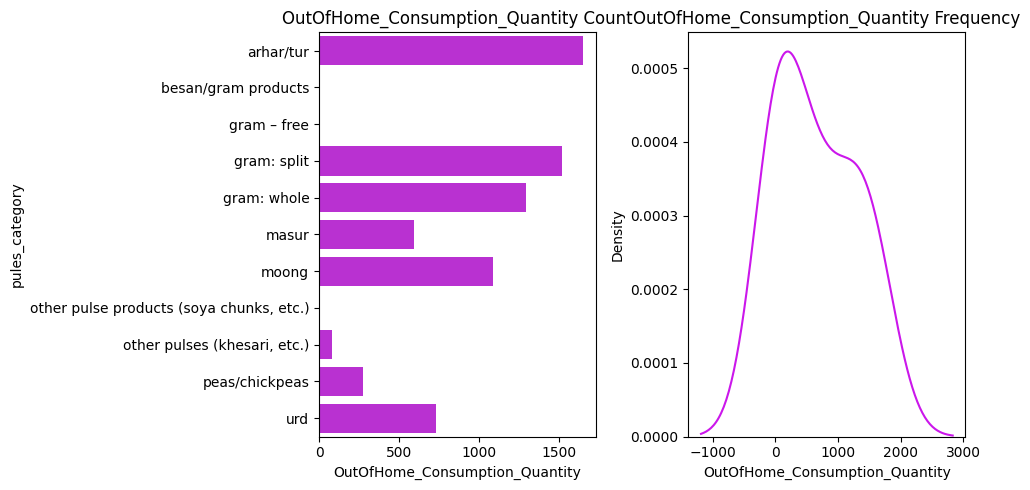

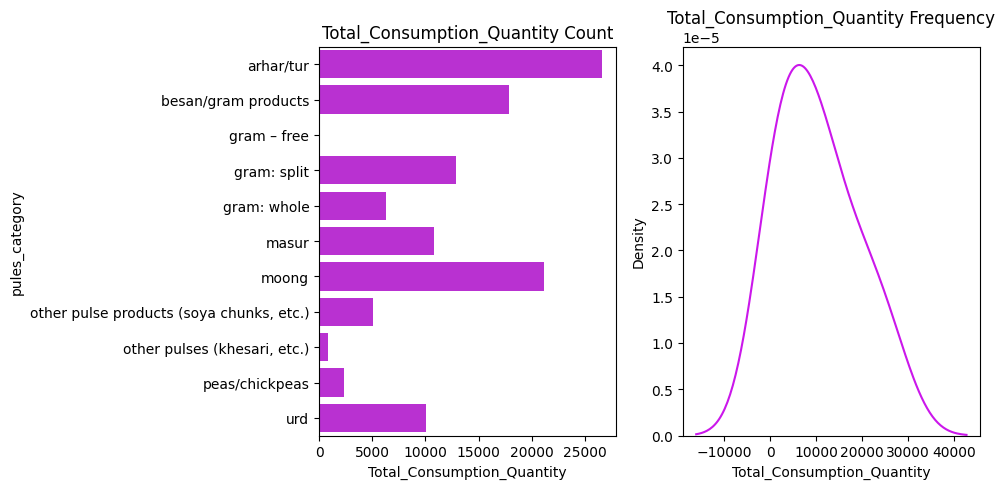

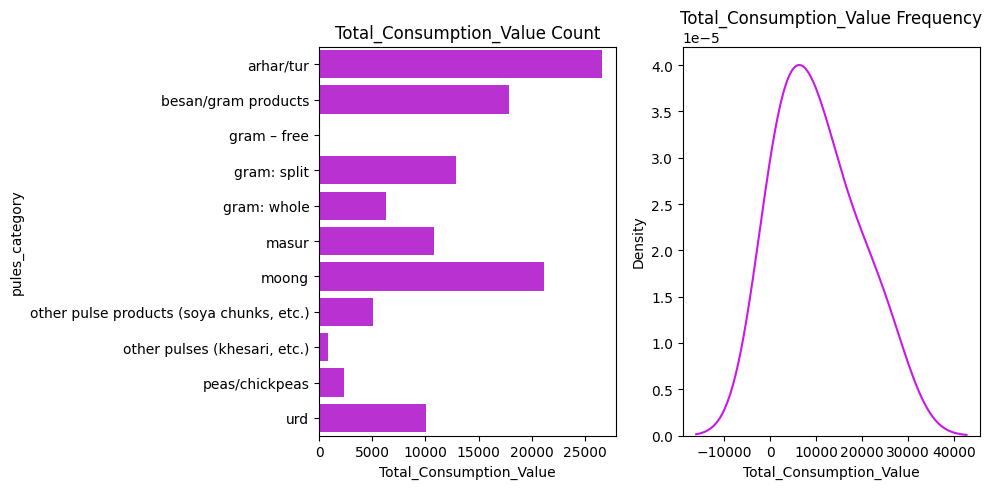

In [15]:
pulses_mapping = {
    140: "arhar/tur",
    141: "gram: split",
    142: "gram: whole",
    143: "moong",
    144: "masur",
    145: "urd",
    146: "peas/chickpeas",
    148: "other pulses (khesari, etc.)",
    150: "besan/gram products",
    152: "other pulse products (soya chunks, etc.)",
    158: "pulses – PDS",
    71: "pulses – free",
    72: "gram – free",
    # 159: "pulses & pulse products: sub-total"
}

auto_label_and_plot(col_name='pules_category', map_dictionary=pulses_mapping)

# Salt & Sugar

salt_sugar_category,candy/misri,honey,jaggery (gur),salt – PDS,salt – free,salt – other sources,sugar – PDS,sugar – free,sugar – other sources
OutOfHome_Consumption_Value,0,4,12,0,0,0,0,0,0
OutOfHome_Consumption_Quantity,0,4,12,0,0,0,0,0,0
Total_Consumption_Quantity,1556,1596,12262,11252,5046,16482,398,94,27814
Total_Consumption_Value,1556,1596,12262,11252,0,16482,398,0,27814


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,9.0,1.777778,4.055175,0.0,0.0,0.0,0.0,12.0
OutOfHome_Consumption_Quantity,9.0,1.777778,4.055175,0.0,0.0,0.0,0.0,12.0
Total_Consumption_Quantity,9.0,8500.000000,9371.411153,94.0,1556.0,5046.0,12262.0,27814.0
Total_Consumption_Value,9.0,7928.888889,9756.794510,0.0,398.0,1596.0,12262.0,27814.0


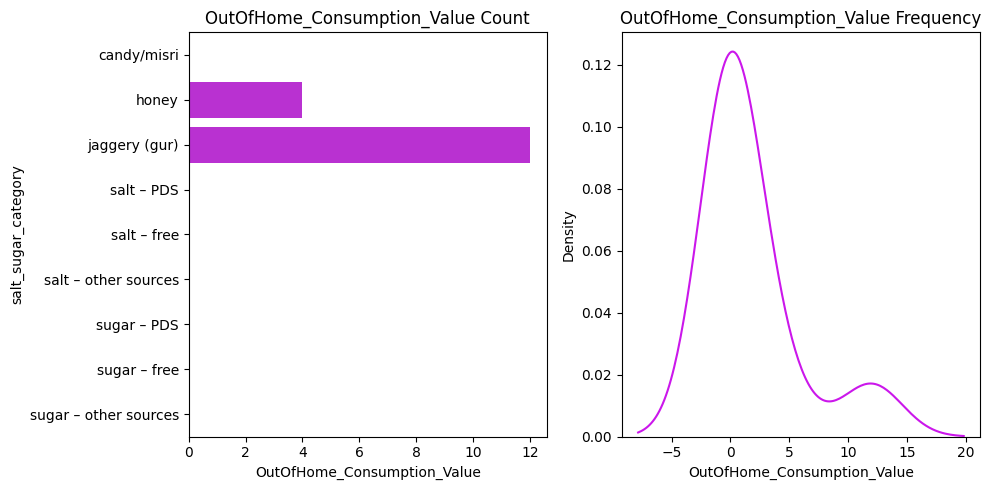

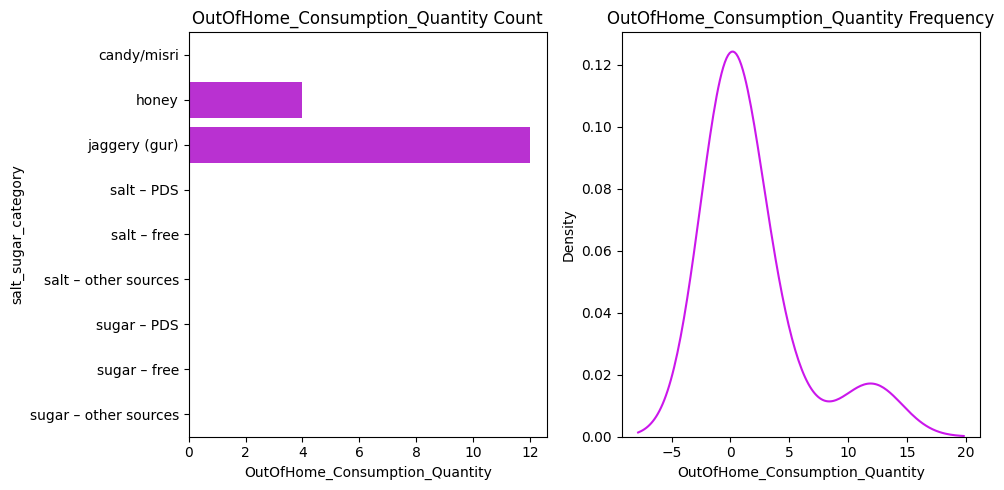

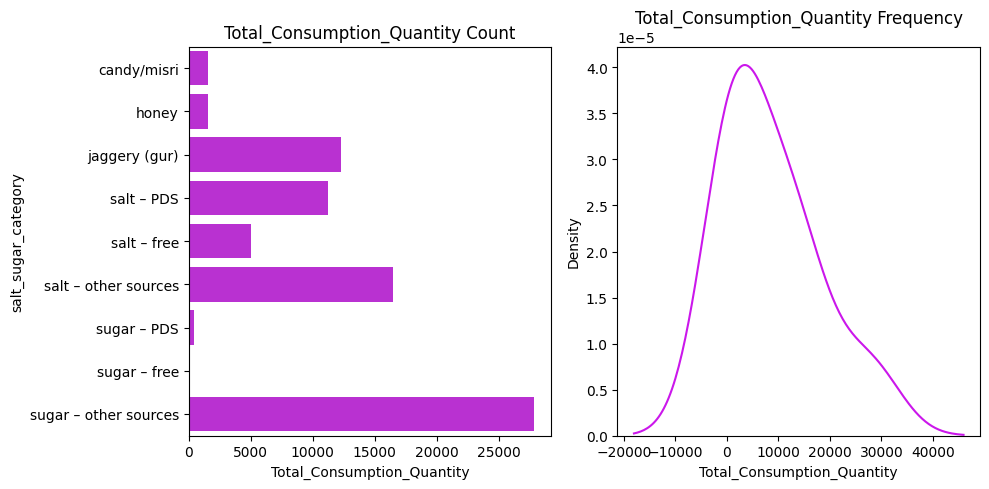

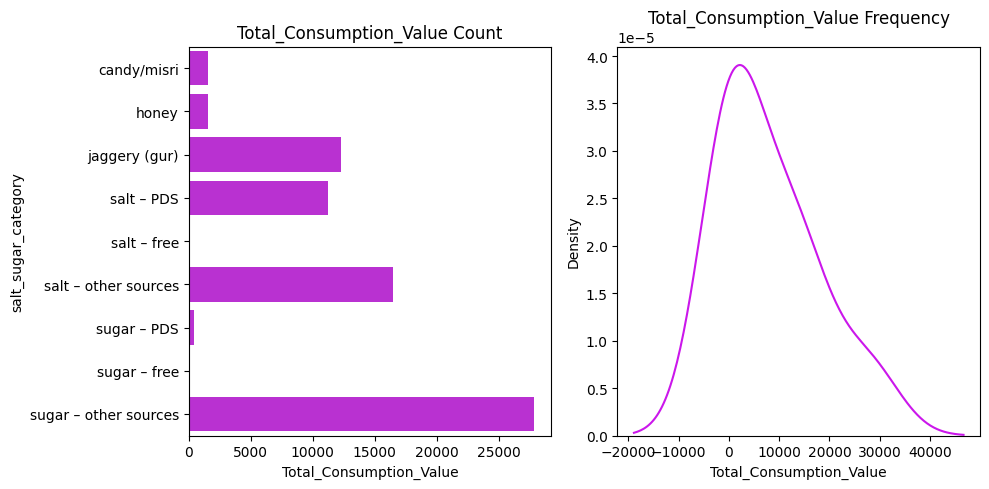

In [16]:
salt_sugar_mapping = {
    73: "salt – free",
    74: "sugar – free",
    178: "salt – PDS",
    170: "salt – other sources",
    171: "sugar – PDS",
    172: "sugar – other sources",
    173: "jaggery (gur)",
    174: "candy/misri",
    175: "honey",
    #179: "salt & sugar: sub-total"
}

auto_label_and_plot(col_name='salt_sugar_category',  map_dictionary=salt_sugar_mapping)

# Milk 

milk_category,butter,cheese,curd/yogurt,ghee,ice-cream,milk: condensed/powder,milk: liquid,"other milk products (lassi, buttermilk, etc.)",paneer,prepared sweets
OutOfHome_Consumption_Value,0,0,0,0,0,0,6974,2658,0,0
OutOfHome_Consumption_Quantity,0,0,0,0,0,0,6974,2658,0,0
Total_Consumption_Quantity,120,14,5268,11048,0,90,27380,2658,3276,5322
Total_Consumption_Value,120,14,5268,11048,6362,90,27380,2658,3276,5322


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,10.0,963.2,2271.174381,0.0,0.0,0.0,0.0,6974.0
OutOfHome_Consumption_Quantity,10.0,963.2,2271.174381,0.0,0.0,0.0,0.0,6974.0
Total_Consumption_Quantity,10.0,5517.6,8440.503871,0.0,97.5,2967.0,5308.5,27380.0
Total_Consumption_Value,10.0,6153.8,8215.165837,14.0,754.5,4272.0,6102.0,27380.0


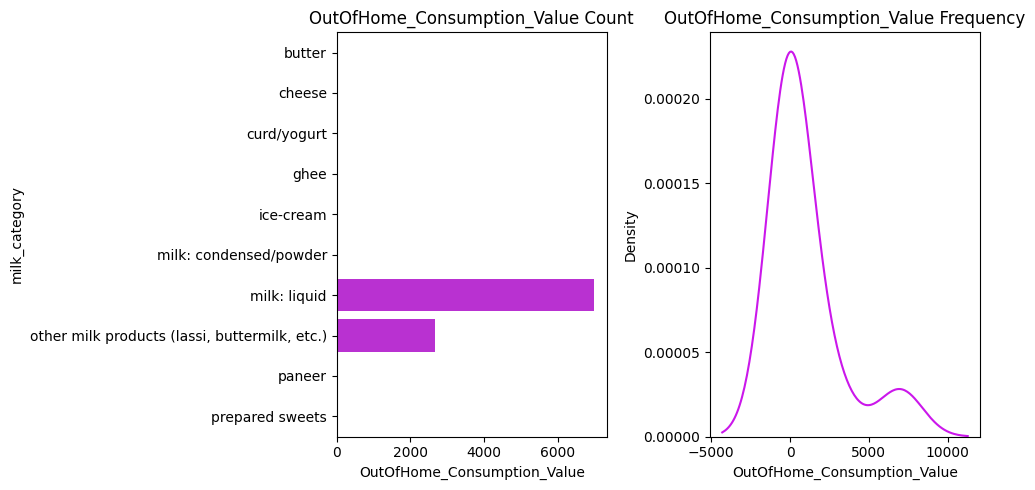

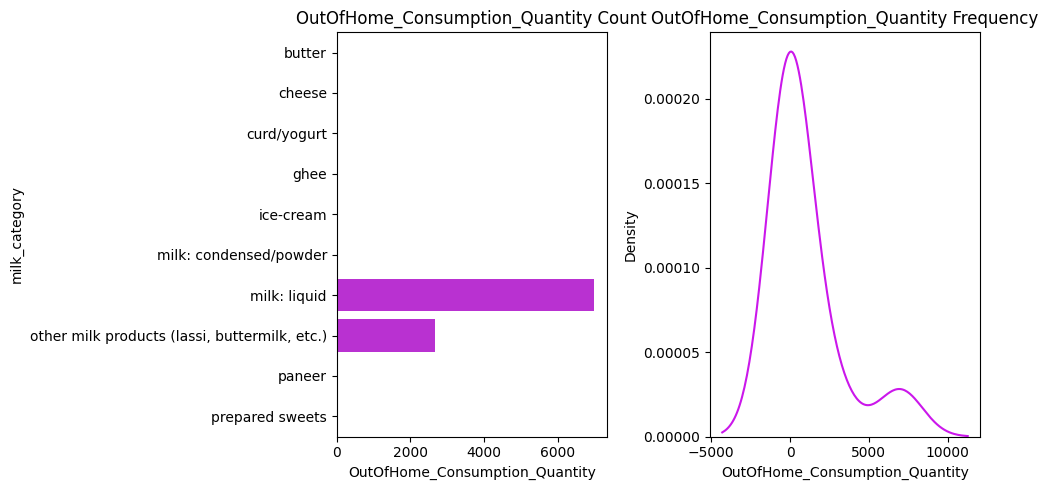

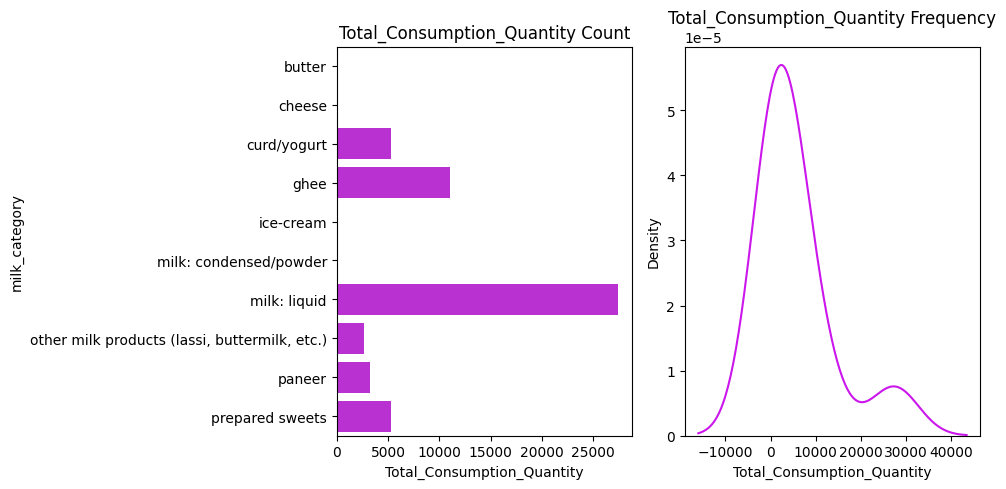

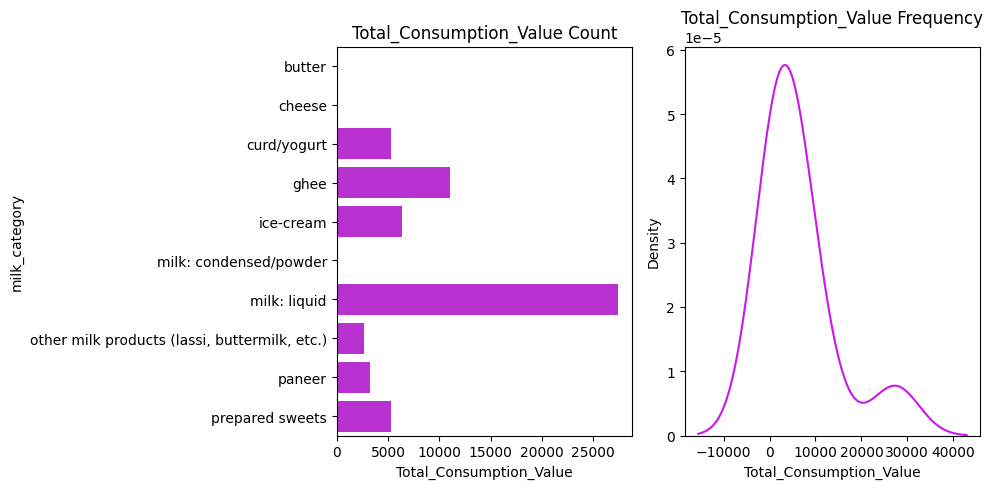

In [17]:
milk_mapping = {
    160: "milk: liquid",
    162: "milk: condensed/powder",
    163: "curd/yogurt",
    164: "ghee",
    165: "butter",
    166: "ice-cream",
    3: "paneer",
    4: "prepared sweets",
    5: "cheese",
    92: "other milk products (lassi, buttermilk, etc.)",
    # 169: "milk & milk products: sub-total"
}

auto_label_and_plot(col_name='milk_category', map_dictionary=milk_mapping)

# Vegetables

vegetables_category,beans/barbati,brinjal,cabbage,carrot,cauliflower,gourd/pumpkin,green chillies,lady’s finger,leafy vegetables,lemon,onion,other vegetables,parwal/patal/kundru,peas,potato,radish,tomato
OutOfHome_Consumption_Value,410,1022,12,34,124,1340,616,206,1158,504,826,722,38,150,498,344,504
OutOfHome_Consumption_Quantity,410,1022,12,34,124,1340,616,206,1158,504,826,722,38,150,498,344,504
Total_Consumption_Quantity,8900,20282,7802,3722,13688,15102,26546,13226,17544,9258,27772,14570,2568,6752,27628,5906,27484
Total_Consumption_Value,8900,20282,7802,3722,13688,15102,26546,13226,17544,9258,27772,14570,2568,6752,27628,5906,27484


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,17.0,500.470588,405.554269,12.0,150.0,498.0,722.0,1340.0
OutOfHome_Consumption_Quantity,17.0,500.470588,405.554269,12.0,150.0,498.0,722.0,1340.0
Total_Consumption_Quantity,17.0,14632.352941,8672.363237,2568.0,7802.0,13688.0,20282.0,27772.0
Total_Consumption_Value,17.0,14632.352941,8672.363237,2568.0,7802.0,13688.0,20282.0,27772.0


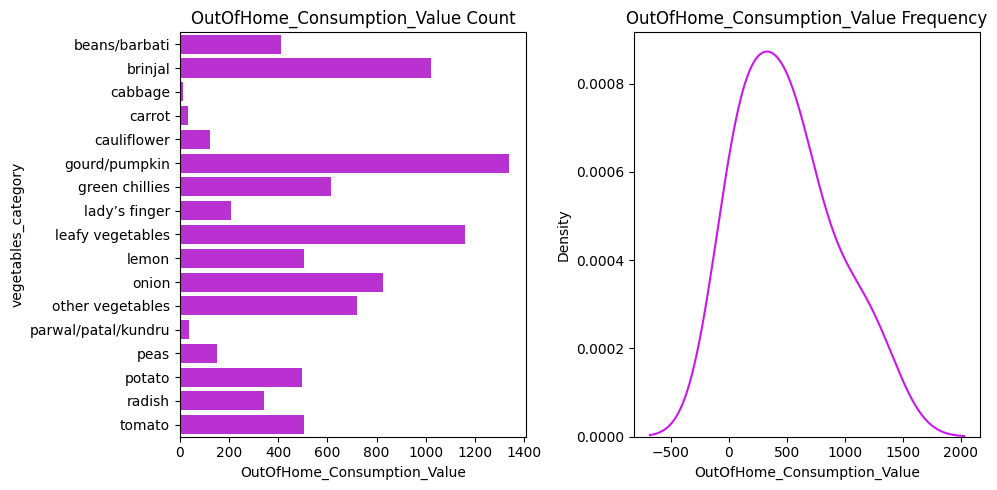

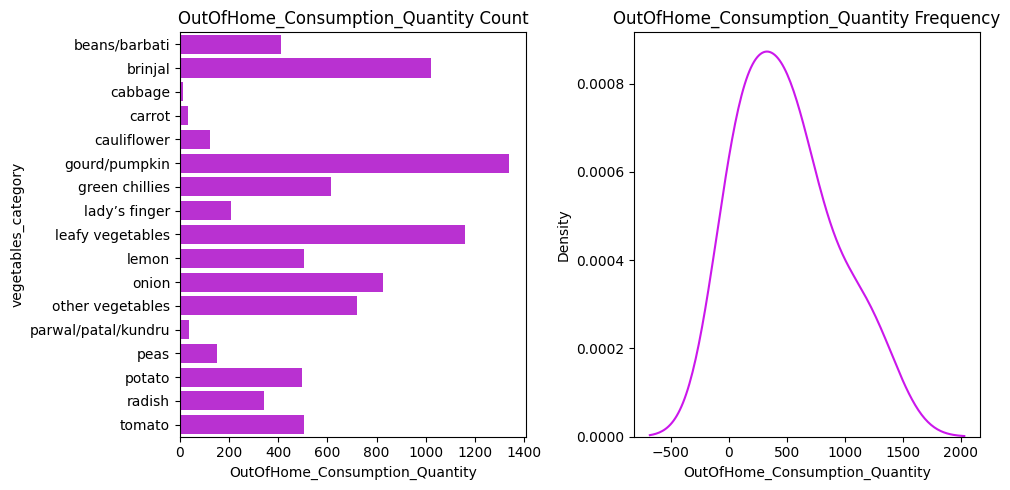

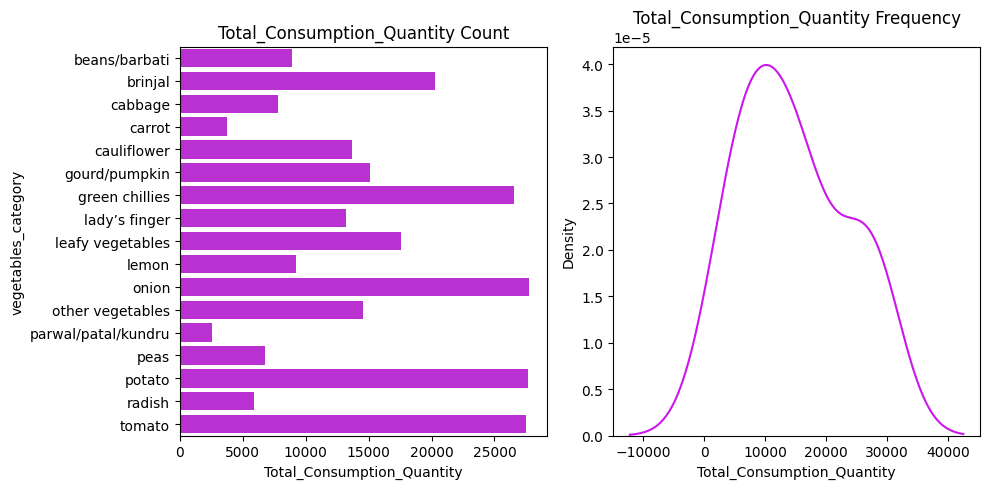

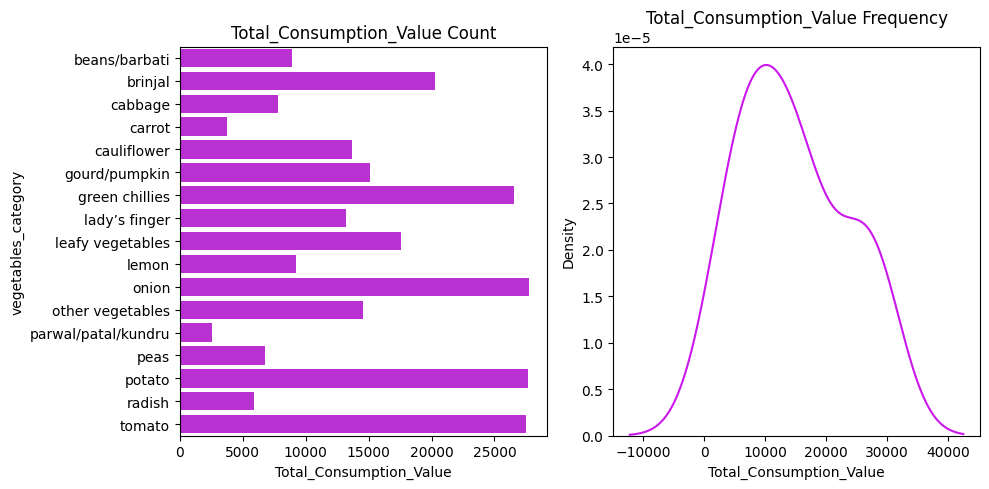

In [18]:
vegetables_mapping = {
    200: "potato",
    201: "onion",
    202: "tomato",
    203: "brinjal",
    204: "radish",
    205: "carrot",
    206: "leafy vegetables",
    207: "green chillies",
    208: "lady’s finger",
    210: "parwal/patal/kundru",
    211: "cauliflower",
    212: "cabbage",
    213: "gourd/pumpkin",
    214: "peas",
    215: "beans/barbati",
    216: "lemon",
    217: "other vegetables",
    # 219: "vegetables: sub-total"
}


auto_label_and_plot(col_name='vegetables_category', map_dictionary=vegetables_mapping)

# Fresh Fruits

fresh_fruit_category,apple,banana,coconut,grapes,green coconut,guava,kharbooza,mango,orange/sweet lime (mausami),"other fresh fruits (litchi, pineapple, etc.)",papaya,watermelon
OutOfHome_Consumption_Value,0,8,0,2,0,486,0,128,6,2574,488,0
OutOfHome_Consumption_Quantity,0,8,0,2,0,486,0,128,6,2574,488,0
Total_Consumption_Quantity,6788,14802,6794,4552,1298,4518,1222,4760,1732,2574,5642,3484
Total_Consumption_Value,6788,14802,6794,4552,1298,4518,1222,4760,1732,2574,5642,3484


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,12.0,307.666667,737.341580,0.0,0.0,4.0,217.5,2574.0
OutOfHome_Consumption_Quantity,12.0,307.666667,737.341580,0.0,0.0,4.0,217.5,2574.0
Total_Consumption_Quantity,12.0,4847.166667,3692.236618,1222.0,2363.5,4535.0,5928.5,14802.0
Total_Consumption_Value,12.0,4847.166667,3692.236618,1222.0,2363.5,4535.0,5928.5,14802.0


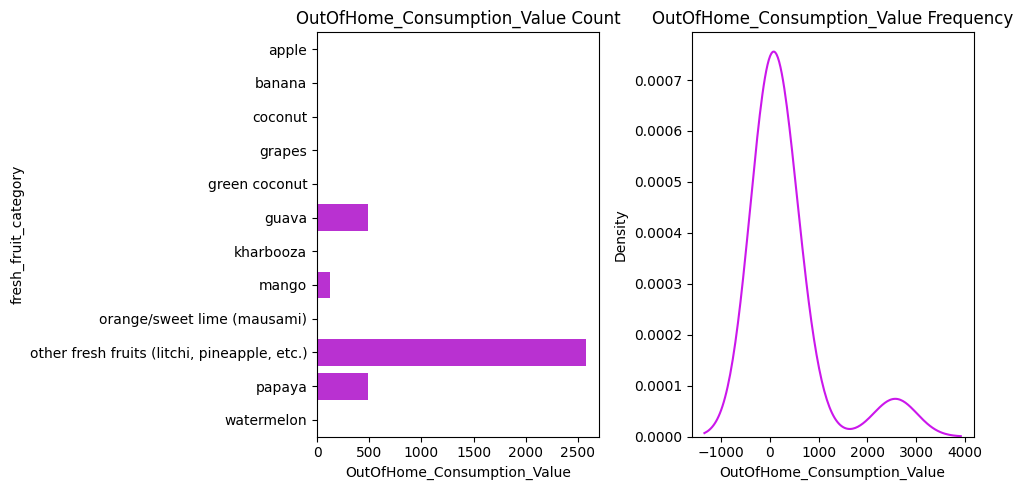

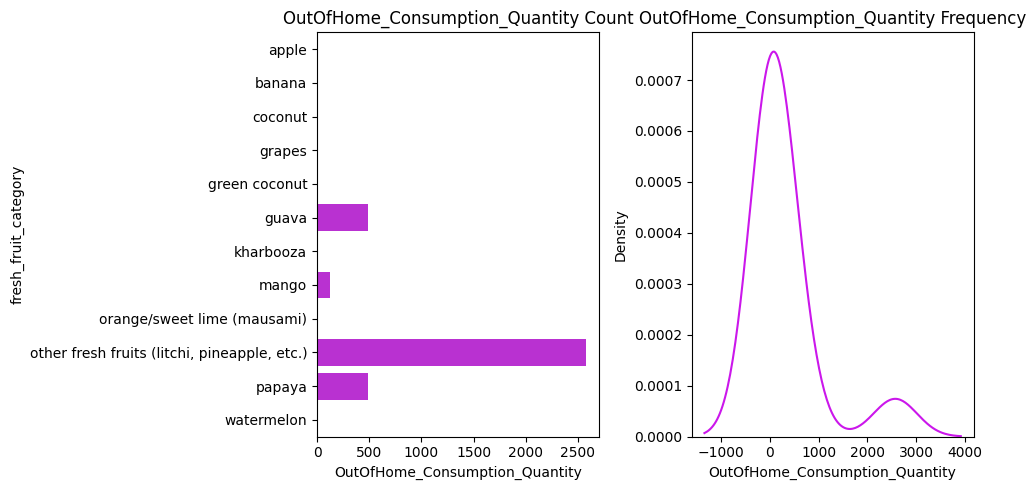

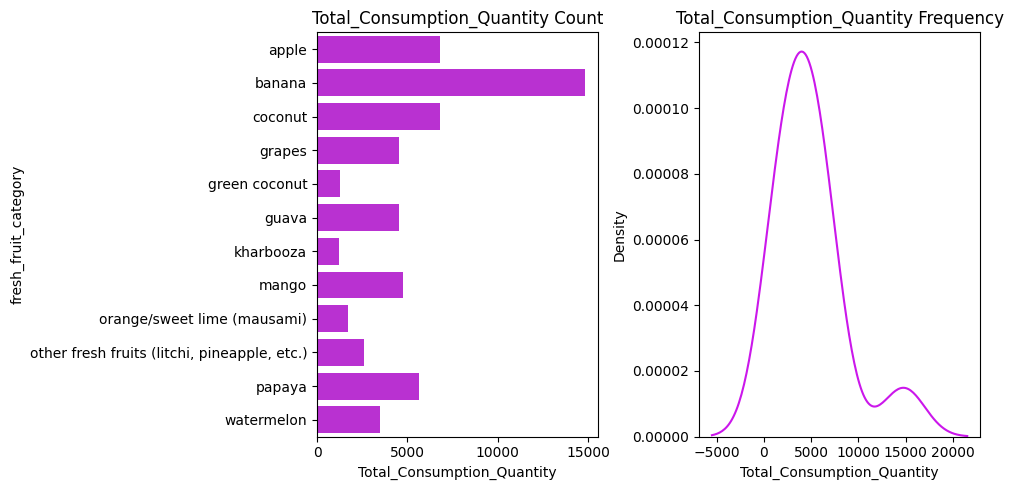

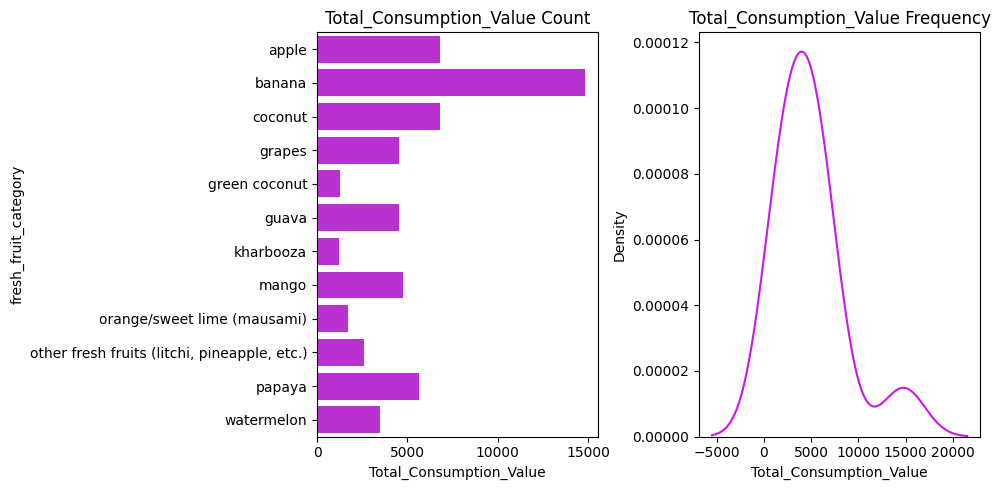

In [19]:
fruits_fresh_mapping = {
    220: "banana",
    224: "coconut",
    225: "green coconut",
    226: "guava",
    228: "orange/sweet lime (mausami)",
    230: "papaya",
    231: "mango",
    232: "kharbooza",
    236: "apple",
    237: "grapes",
    222: "watermelon",
    93: "other fresh fruits (litchi, pineapple, etc.)",
    # 239: "fruits (fresh): sub-total"
}

auto_label_and_plot(col_name='fresh_fruit_category', map_dictionary=fruits_fresh_mapping)

# Dry Fruits

fruits_dry_category,cashew nut,coconut: copra,dates,groundnut,"other dry fruits (apricot, fig, etc.)","other nuts (almond, pistachio, walnut, etc.)",raisin/kishmish
OutOfHome_Consumption_Value,0,2,0,424,1064,0,0
OutOfHome_Consumption_Quantity,0,2,0,424,1064,0,0
Total_Consumption_Quantity,3278,2802,2288,19060,1064,3410,6684
Total_Consumption_Value,3278,2802,2288,19060,1064,3410,6684


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,7.0,212.857143,407.168855,0.0,0.0,0.0,213.0,1064.0
OutOfHome_Consumption_Quantity,7.0,212.857143,407.168855,0.0,0.0,0.0,213.0,1064.0
Total_Consumption_Quantity,7.0,5512.285714,6216.296156,1064.0,2545.0,3278.0,5047.0,19060.0
Total_Consumption_Value,7.0,5512.285714,6216.296156,1064.0,2545.0,3278.0,5047.0,19060.0


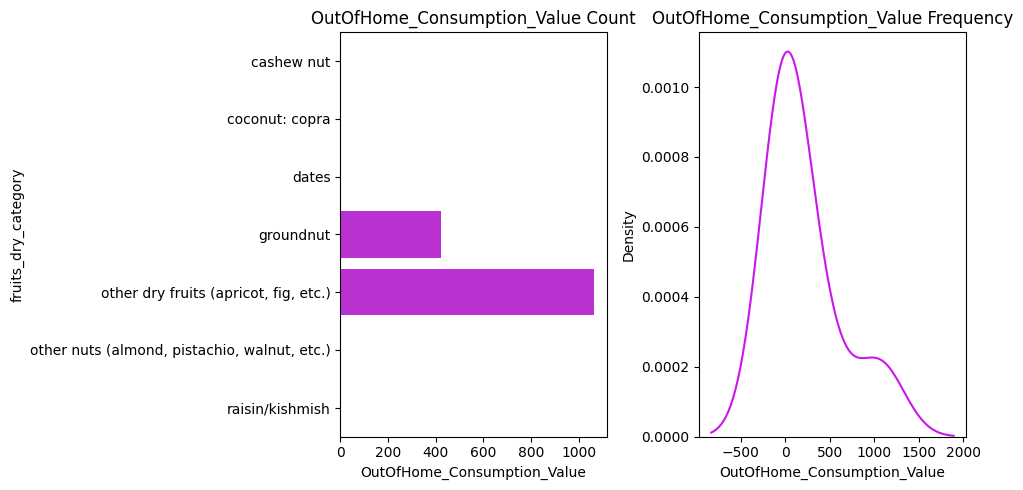

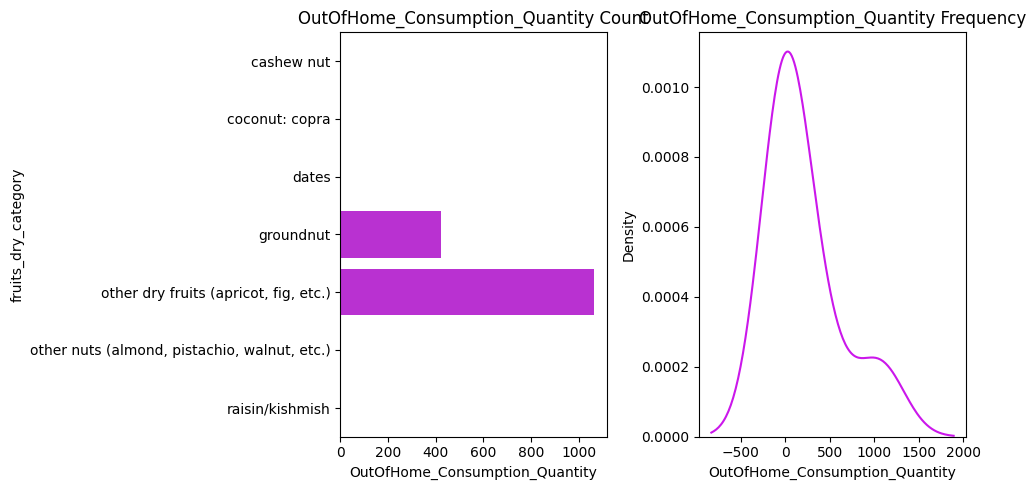

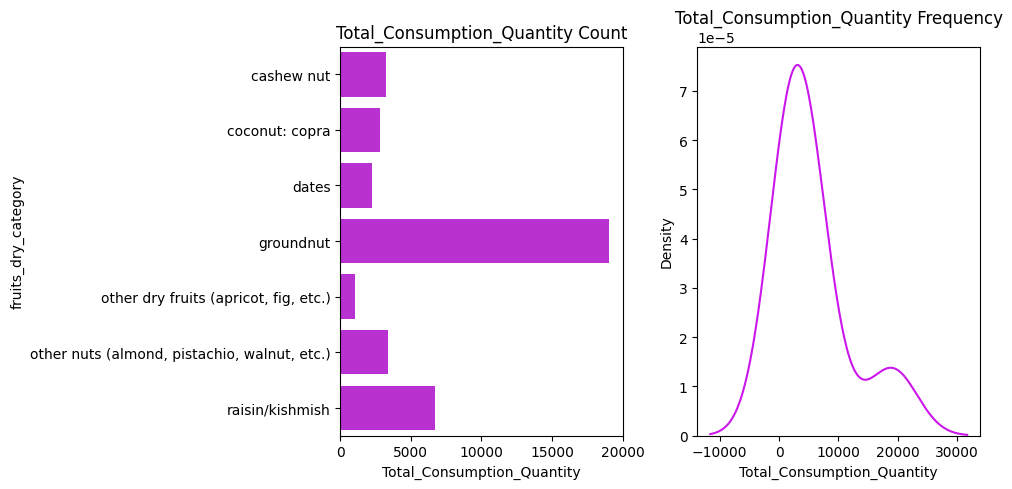

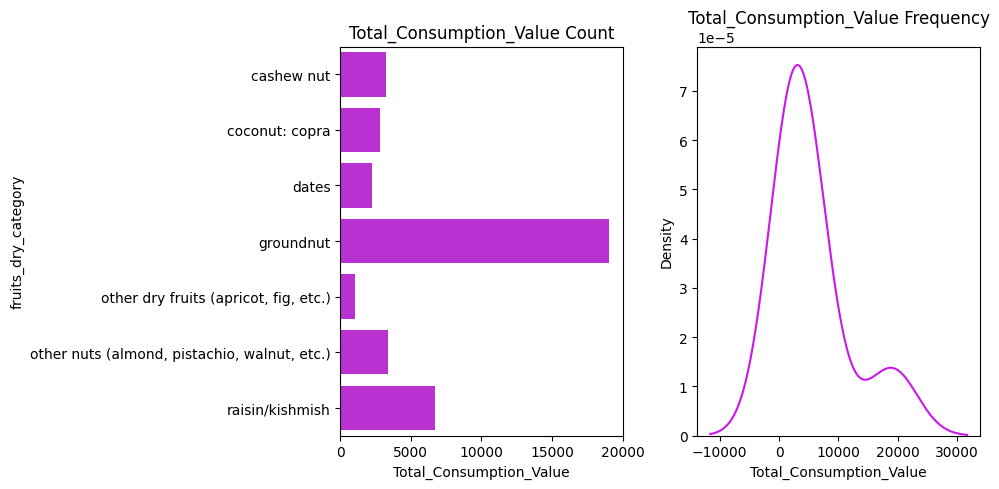

In [20]:
fruits_dry_mapping = {
    240: "coconut: copra",
    241: "groundnut",
    242: "dates",
    243: "cashew nut",
    245: "other nuts (almond, pistachio, walnut, etc.)",
    246: "raisin/kishmish",
    94: "other dry fruits (apricot, fig, etc.)",
    # 249: "fruits (dry): sub-total"
}


auto_label_and_plot(col_name='fruits_dry_category', map_dictionary=fruits_dry_mapping)

# Non Veg

nonveg_category,beef/buffalo meat,chicken,eggs,fish/prawn,goat meat/mutton,"other meat (crab, oyster, etc.)"
OutOfHome_Consumption_Value,0,268,134,4,2,0
OutOfHome_Consumption_Quantity,0,268,134,4,2,0
Total_Consumption_Quantity,170,6948,8934,1860,414,14
Total_Consumption_Value,170,6948,8934,1860,414,14


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,6.0,68.000000,111.405565,0.0,0.5,3.0,101.5,268.0
OutOfHome_Consumption_Quantity,6.0,68.000000,111.405565,0.0,0.5,3.0,101.5,268.0
Total_Consumption_Quantity,6.0,3056.666667,3890.806737,14.0,231.0,1137.0,5676.0,8934.0
Total_Consumption_Value,6.0,3056.666667,3890.806737,14.0,231.0,1137.0,5676.0,8934.0


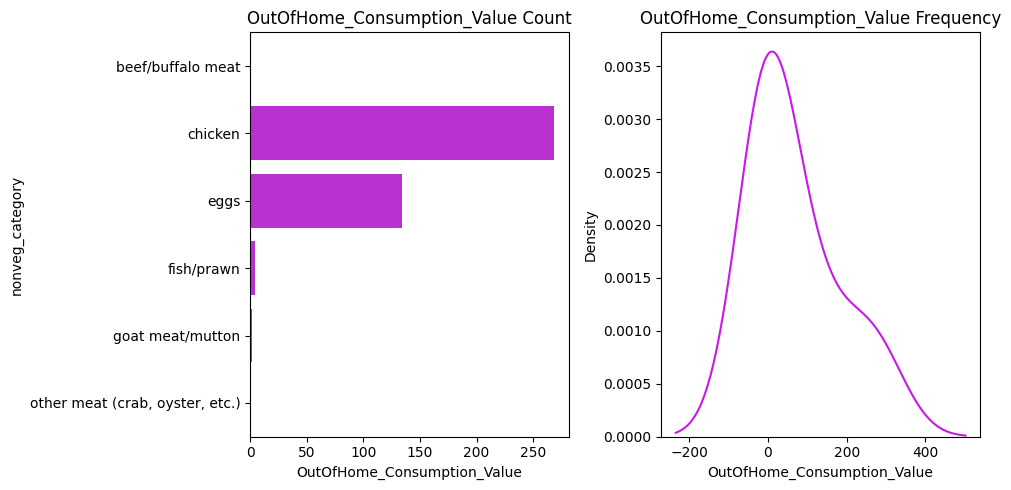

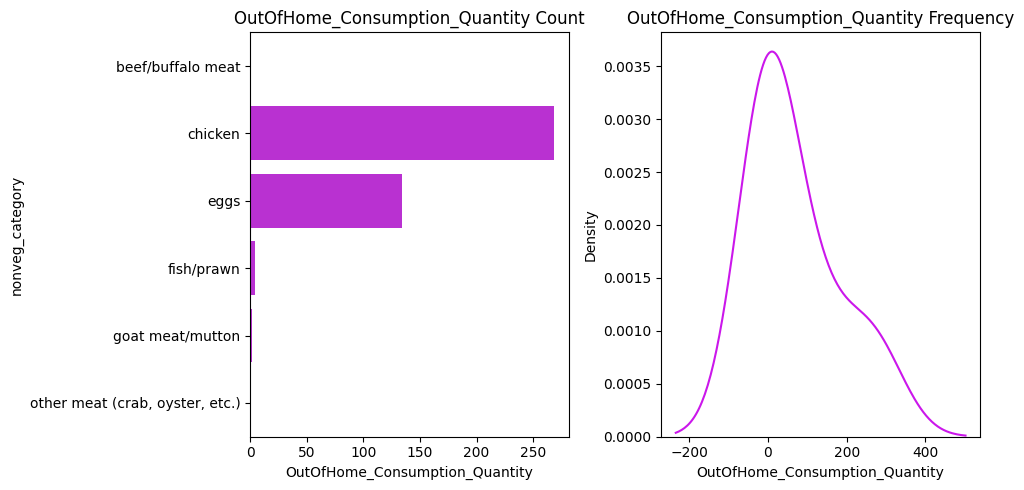

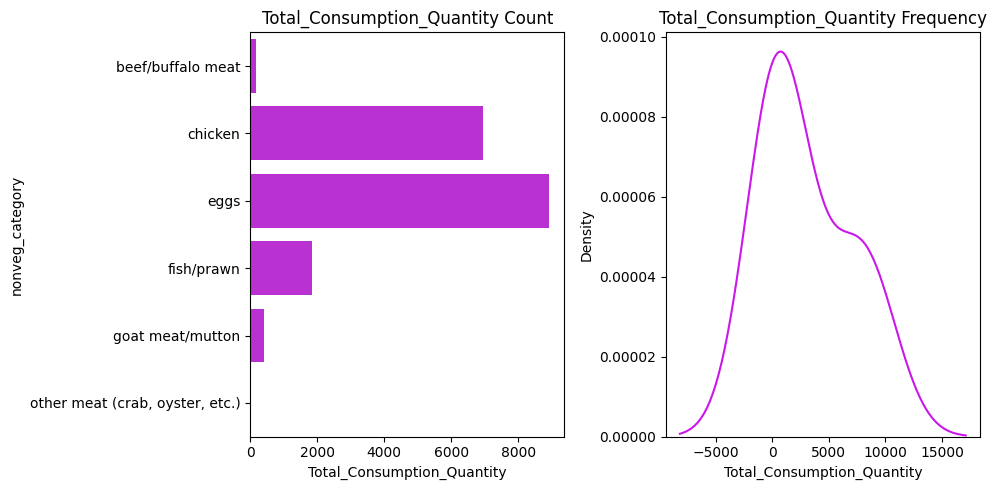

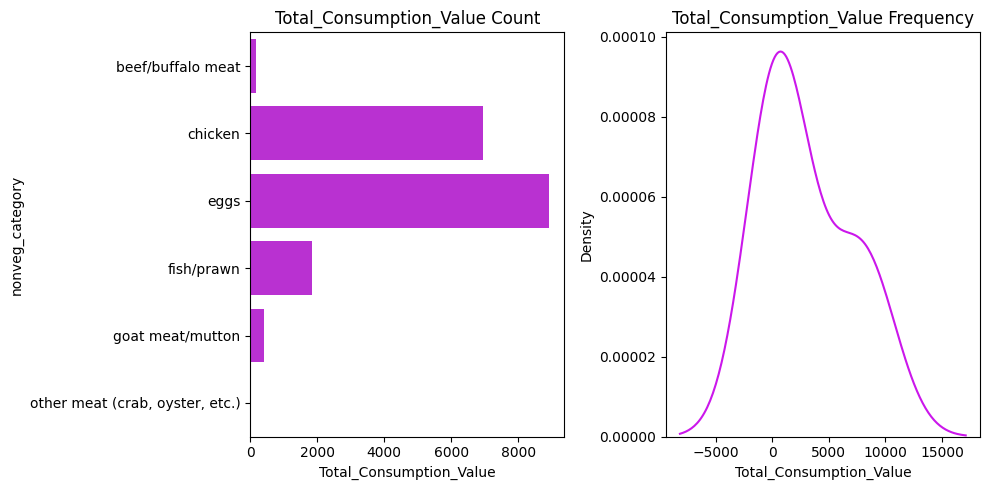

In [21]:
nonveg_mapping = {
    190: "eggs",
    191: "fish/prawn",
    192: "goat meat/mutton",
    193: "beef/buffalo meat",
    194: "pork",
    195: "chicken",
    196: "other meat (crab, oyster, etc.)",
    # 199: "egg, fish & meat: sub-total"
}

auto_label_and_plot(col_name='nonveg_category', map_dictionary=nonveg_mapping)

# Edible Oil

edible_oil_category,coconut oil,groundnut oil,mustard oil,"other oils (vanaspati, margarine, etc.)",refined oil
OutOfHome_Consumption_Value,0,16,682,400,0
OutOfHome_Consumption_Quantity,0,16,682,400,0
Total_Consumption_Quantity,2,278,8628,400,25078
Total_Consumption_Value,2,278,8628,400,25078


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,5.0,219.6,309.943221,0.0,0.0,16.0,400.0,682.0
OutOfHome_Consumption_Quantity,5.0,219.6,309.943221,0.0,0.0,16.0,400.0,682.0
Total_Consumption_Quantity,5.0,6877.2,10806.321724,2.0,278.0,400.0,8628.0,25078.0
Total_Consumption_Value,5.0,6877.2,10806.321724,2.0,278.0,400.0,8628.0,25078.0


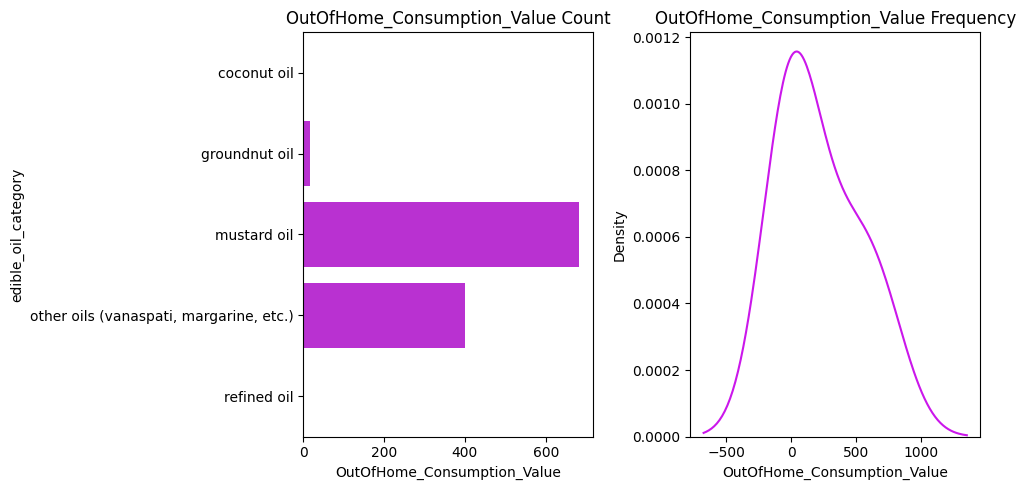

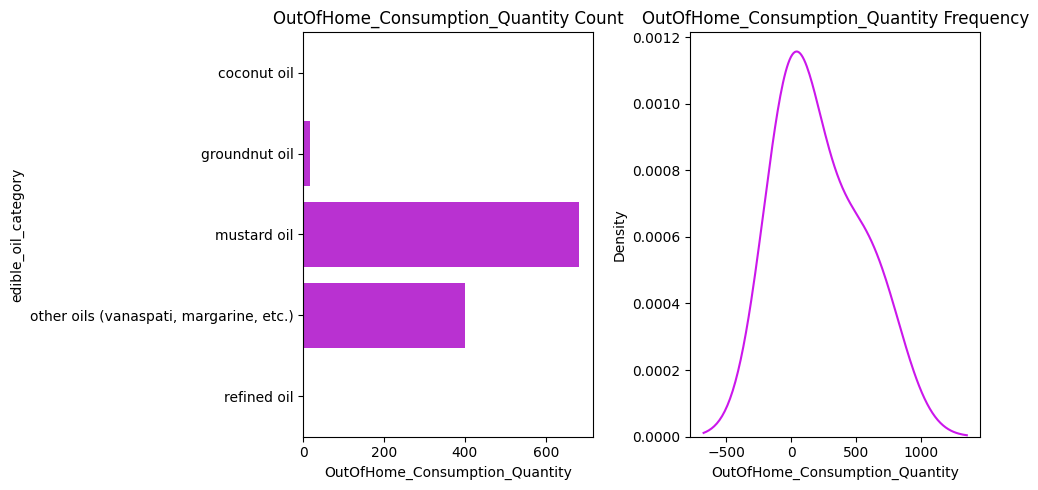

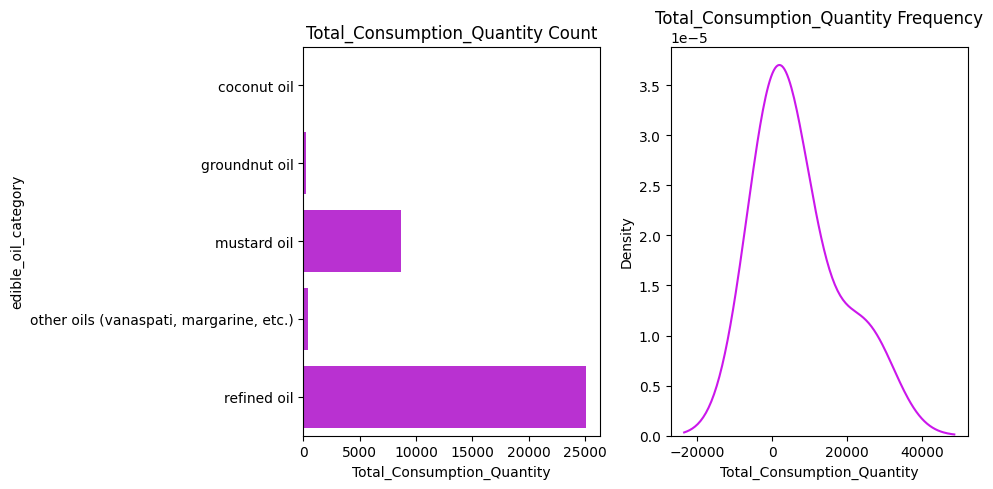

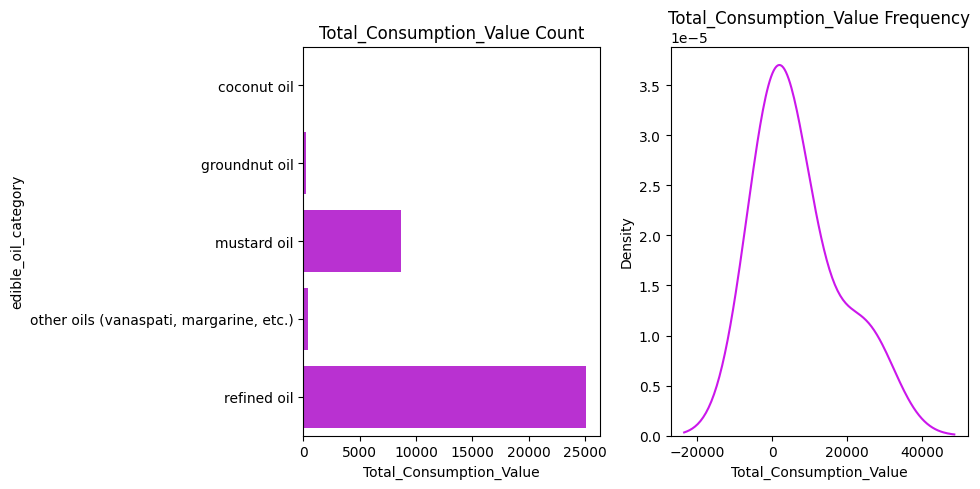

In [22]:
edible_oil_mapping = {
    181: "mustard oil",
    182: "groundnut oil",
    183: "coconut oil",
    184: "refined oil",
    188: "edible oil – PDS",
    95: "other oils (vanaspati, margarine, etc.)",
    75: "edible oil – free",
    # 189: "edible oil: sub-total"
}

auto_label_and_plot(col_name='edible_oil_category', map_dictionary=edible_oil_mapping)

# Spices

spices_category,black pepper,coriander,cumin,curry powder,dry chillies,garlic,ginger,oilseeds,other spices,poppy seeds,tamarind,turmeric
OutOfHome_Consumption_Value,0,332,2,0,136,742,50,616,0,0,4,6
OutOfHome_Consumption_Quantity,0,332,2,0,136,742,50,616,0,0,4,6
Total_Consumption_Quantity,7284,27688,27524,15312,27602,26324,22564,12168,14048,280,666,27918
Total_Consumption_Value,7284,27688,27524,15312,27602,26324,22564,12168,14048,280,666,27918


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,12.0,157.333333,263.585533,0.0,0.0,5.0,185.0,742.0
OutOfHome_Consumption_Quantity,12.0,157.333333,263.585533,0.0,0.0,5.0,185.0,742.0
Total_Consumption_Quantity,12.0,17448.166667,10650.430481,280.0,10947.0,18938.0,27543.5,27918.0
Total_Consumption_Value,12.0,17448.166667,10650.430481,280.0,10947.0,18938.0,27543.5,27918.0


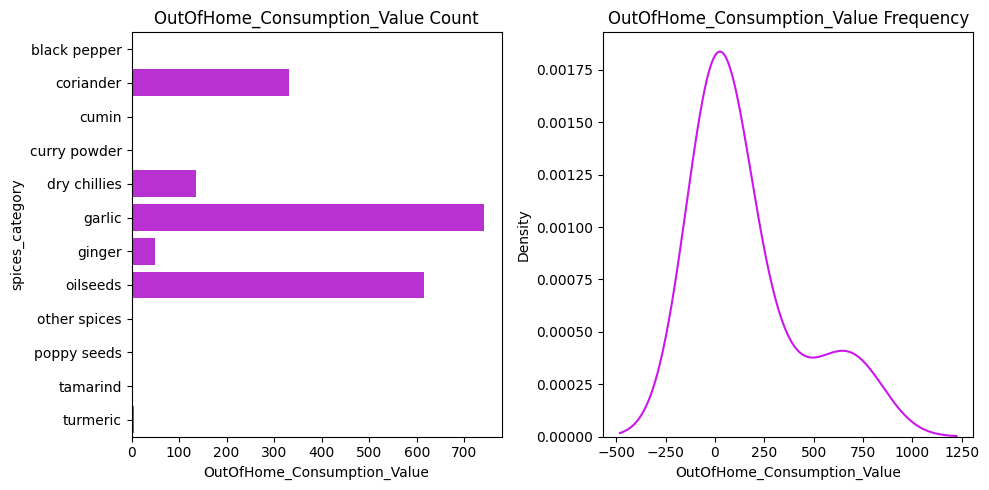

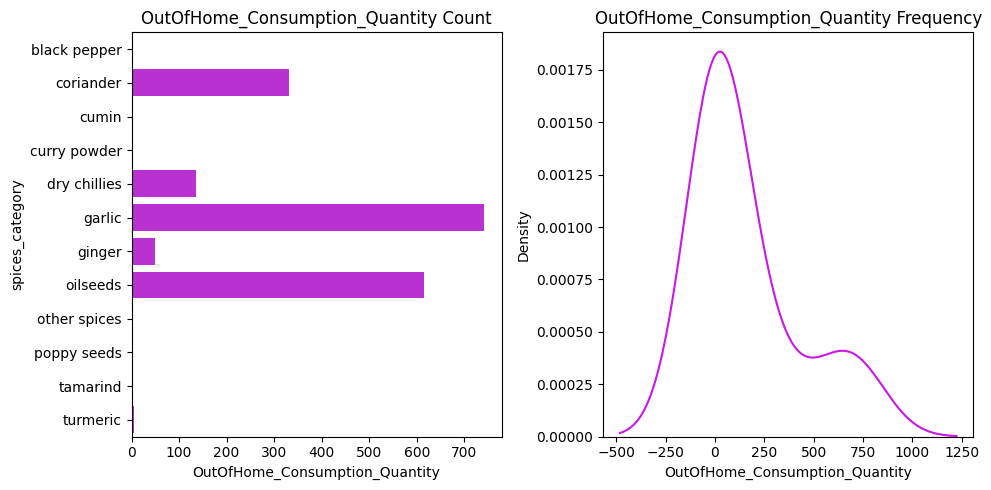

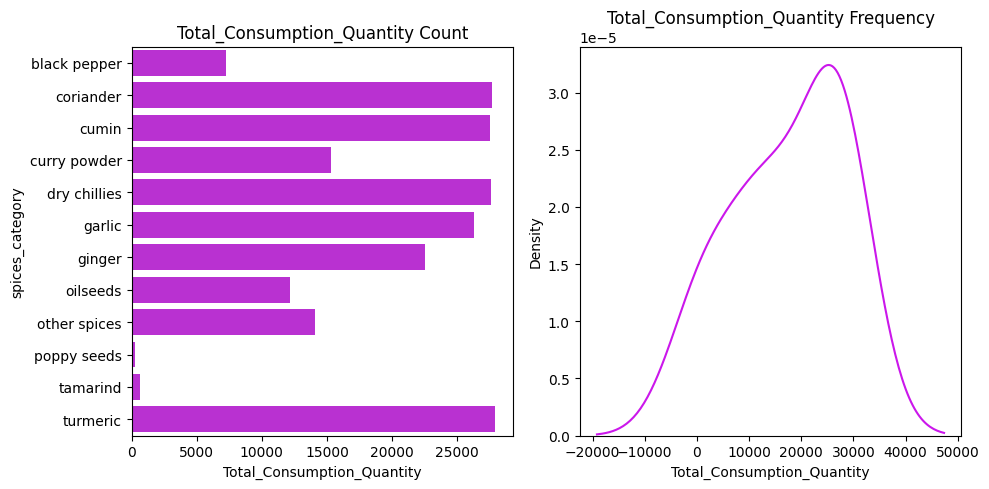

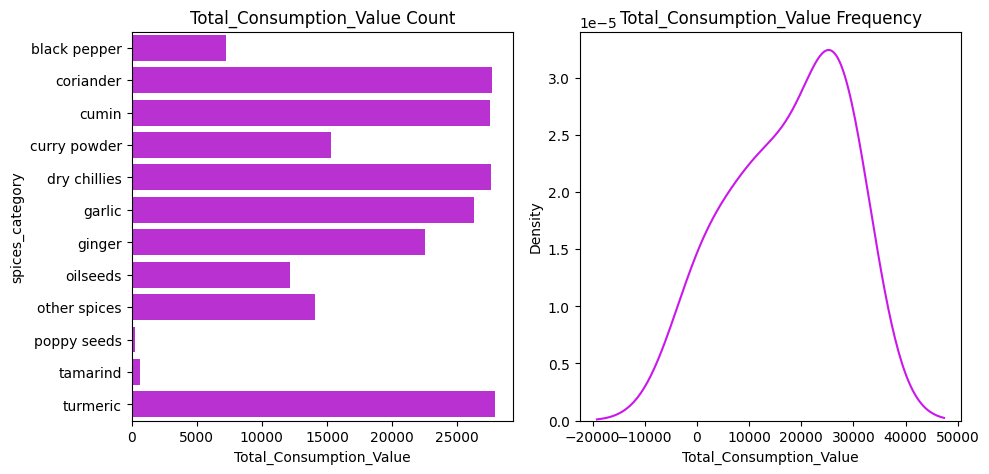

In [23]:
spices_mapping = {
    250: "ginger",
    251: "garlic",
    252: "cumin",
    253: "coriander",
    254: "turmeric",
    255: "black pepper",
    256: "dry chillies",
    257: "tamarind",
    258: "curry powder",
    260: "oilseeds",
    261: "other spices",
    263: "poppy seeds",
    # 269: "spices: sub-total"
}

auto_label_and_plot(col_name='spices_category', map_dictionary=spices_mapping)

# Beverages

beverages_category,coffee: cups,coffee: powder,fruit juice/shake,mineral water,"other beverages (cocoa, health drinks)",other cold beverages,soda drinks,tea: cups,tea: leaf
OutOfHome_Consumption_Value,0,0,0,0,0,0,0,0,0
OutOfHome_Consumption_Quantity,0,0,0,0,0,0,0,0,0
Total_Consumption_Quantity,500,662,0,2808,0,872,986,14576,27654
Total_Consumption_Value,500,662,9198,2808,2338,872,986,14576,27654


,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,9.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
OutOfHome_Consumption_Quantity,9.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Total_Consumption_Quantity,9.0,5339.777778,9558.308817,0.0,500.0,872.0,2808.0,27654.0
Total_Consumption_Value,9.0,6621.555556,9239.681043,500.0,872.0,2338.0,9198.0,27654.0


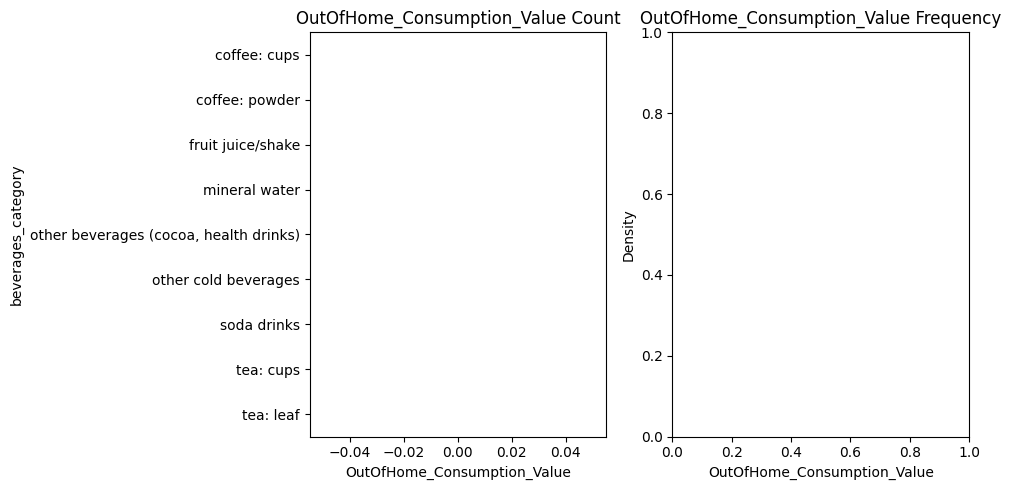

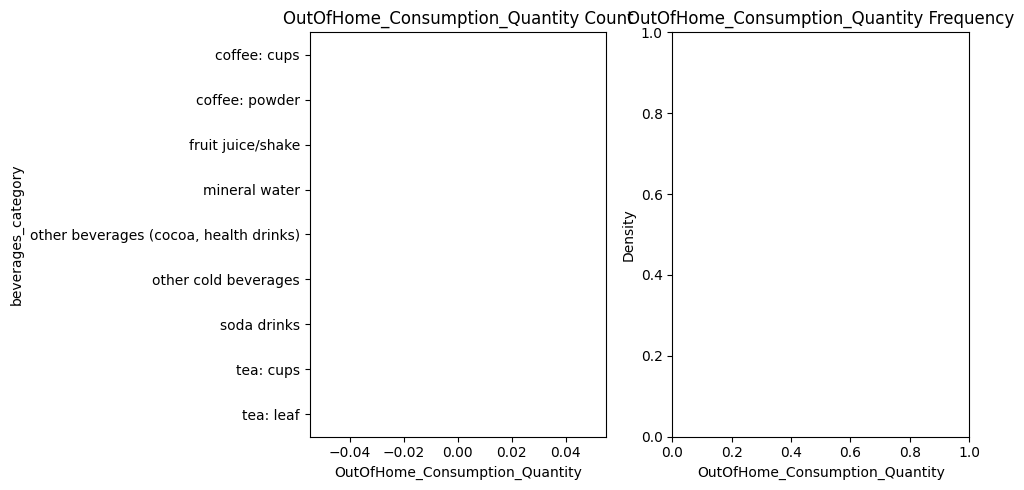

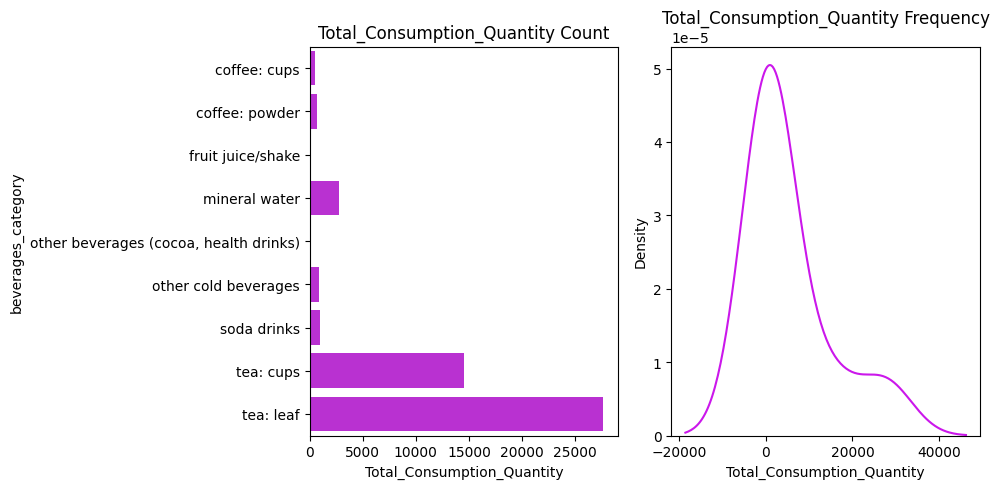

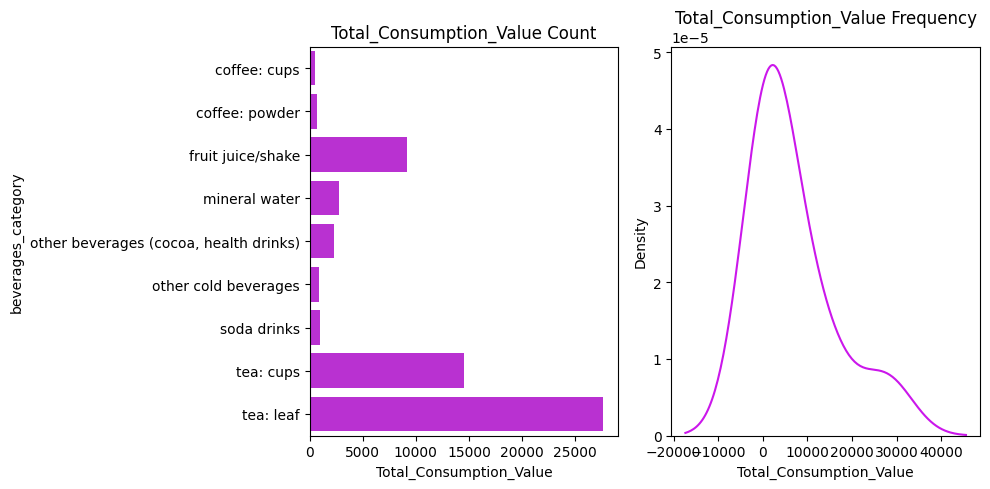

In [24]:
beverages_mapping = {
    11: "soda drinks",
    270: "tea: cups",
    271: "tea: leaf",
    272: "coffee: cups",
    273: "coffee: powder",
    274: "mineral water",
    275: "other cold beverages",
    276: "fruit juice/shake",
    278: "other beverages (cocoa, health drinks)",
    # 279: "beverages: sub-total"
}

auto_label_and_plot(col_name='beverages_category', map_dictionary=beverages_mapping)

In [25]:
df.columns

Index(['State', 'Item_Code', 'OutOfHome_Consumption_Value',
       'OutOfHome_Consumption_Quantity', 'Total_Consumption_Quantity',
       'Total_Consumption_Value', 'category', 'cereal_category',
       'pules_category', 'salt_sugar_category', 'milk_category',
       'vegetables_category', 'fresh_fruit_category', 'fruits_dry_category',
       'nonveg_category', 'edible_oil_category', 'spices_category',
       'beverages_category'],
      dtype='object')

In [26]:
# Done 🙌